
Data Cleaning and EDA

In [102]:
import pandas as pd

# Reload the clean CSV
df = pd.read_csv('marketing_campaign_clean.csv')

# Now parse dates 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [103]:
# Check the shape (rows, columns)
df.shape

(2240, 29)

In [104]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
281,10144,1976,Graduation,Together,51369.0,0,1,2012-10-25,84,297,...,8,0,0,0,0,0,0,3,11,0
16,9736,1980,Graduation,Married,41850.0,1,1,2012-12-24,51,53,...,8,0,0,0,0,0,0,3,11,0
1218,4500,1991,PhD,Together,68682.0,0,0,2013-10-06,56,919,...,2,0,0,0,0,0,0,3,11,0
1731,10304,1959,Graduation,Married,18690.0,0,0,2012-12-28,77,6,...,8,0,0,0,0,0,0,3,11,0
1219,9739,1963,Graduation,Single,34377.0,0,1,2013-01-19,55,62,...,7,0,0,0,0,0,0,3,11,0
1394,2587,1972,PhD,Married,29791.0,1,0,2014-05-15,21,14,...,5,0,0,0,0,0,0,3,11,0
1799,762,1981,2n Cycle,Together,75774.0,1,0,2014-05-02,27,340,...,4,0,0,0,0,0,0,3,11,0
1281,9516,1971,2n Cycle,Divorced,49118.0,0,0,2012-08-18,90,620,...,7,0,1,0,0,1,0,3,11,1
1348,7793,1976,Graduation,Together,62061.0,0,1,2013-08-31,12,641,...,6,0,1,0,0,0,0,3,11,0
893,9960,1991,Basic,Single,26868.0,1,0,2014-04-30,52,0,...,7,0,0,0,0,0,0,3,11,0


In [105]:
# List all column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [106]:
# Count missing values in each column
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [107]:
# Check for duplicate IDs
df['ID'].duplicated().sum()

0

In [108]:
# Quick statistics for numeric columns
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [109]:
df = df[(df['Year_Birth'] >= 1935) & (df['Year_Birth'] <= 2010)]

In [110]:
# Unique values for categorical columns
df['Education'].value_counts()

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [111]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [112]:
## Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
print(df['Dt_Customer'].isna().sum())

0


In [113]:
# Create an 'Age' column (assuming current year is 2015 per dataset context)
df['Age'] = 2025 - df['Year_Birth']
df['Age'].describe()

count    2237.000000
mean       56.098346
std        11.701917
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Age, dtype: float64

In [114]:
# Impute missing incomes with median 
df['Income'] = df['Income'].fillna(df['Income'].median())

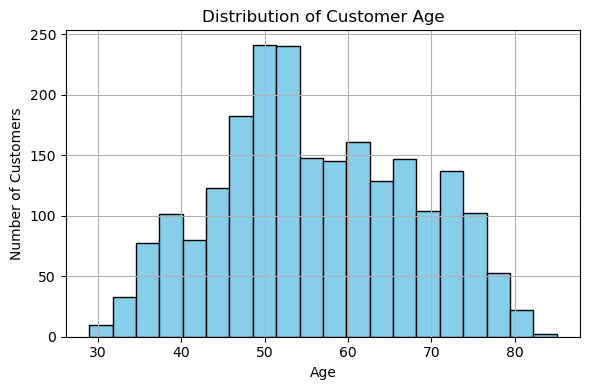

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('age_histogram.png')  # Save to figures folder
plt.show()

In [116]:
print(df.head().to_markdown(index=False))


|   ID |   Year_Birth | Education   | Marital_Status   |   Income |   Kidhome |   Teenhome | Dt_Customer         |   Recency |   MntWines |   MntFruits |   MntMeatProducts |   MntFishProducts |   MntSweetProducts |   MntGoldProds |   NumDealsPurchases |   NumWebPurchases |   NumCatalogPurchases |   NumStorePurchases |   NumWebVisitsMonth |   AcceptedCmp3 |   AcceptedCmp4 |   AcceptedCmp5 |   AcceptedCmp1 |   AcceptedCmp2 |   Complain |   Z_CostContact |   Z_Revenue |   Response |   Age |
|-----:|-------------:|:------------|:-----------------|---------:|----------:|-----------:|:--------------------|----------:|-----------:|------------:|------------------:|------------------:|-------------------:|---------------:|--------------------:|------------------:|----------------------:|--------------------:|--------------------:|---------------:|---------------:|---------------:|---------------:|---------------:|-----------:|----------------:|------------:|-----------:|------:|
| 5524 |      

In [117]:
df.to_csv('marketing_campaign_final.csv', index=False)